In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from ass1_p2_methods import *


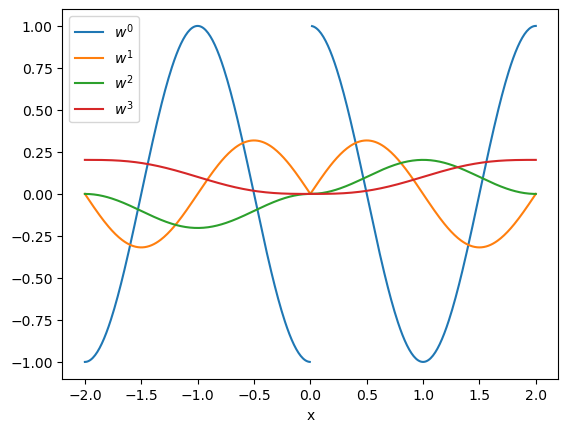

In [3]:
N = 400
XX = np.linspace(-2,2,N)

w0 = np.cos(np.pi*XX)
w0[:int(N/2)] *= -1
w0[int(N/2)] = np.nan

w1 = np.sin(np.pi*XX)/np.pi
w1[:int(N/2)] *= -1

w2 = -np.cos(np.pi*XX)/np.pi**2 + 1/np.pi**2
w2[:int(N/2)] *= -1

w3 = -np.sin(np.pi*XX)/np.pi**3+XX/np.pi**2
w3[:int(N/2)] *= -1

plt.plot(XX,w0,label="$w^0$")
plt.plot(XX,w1,label="$w^1$")
plt.plot(XX,w2,label="$w^2$")
plt.plot(XX,w3,label="$w^3$")
plt.xlabel('x')
plt.legend()
plt.show()


In [4]:
'''def diff_h(N,j,x,xjs):
    dx = x-xjs[j]
    temp1 = np.cos(N*dx/2)*np.cos(dx/2)*N*np.sin(dx/2)-np.sin(N*dx/2)
    return temp1/(2*N*np.sin(dx/2)**2)
    #return np.pi*np.cos(np.pi*N*((dx)/2))*1/2*np.tan(np.pi*dx/2)-np.sin(np.pi*N/2*dx)*np.pi*(1+np.tan(np.pi*1/2*dx)**2)/(2*N*np.tan(np.pi*1/2*dx)**2)

def Dmatrix(N,xjs):
    D = np.zeros((N,N))
    for i in range(N):
        for j in range(N):
                # if i != 0 and i != (N-1):
                    if i == j:
                        D[i][j] = 0
                    else: 
                        D[i][j] = diff_h(N,j,xjs[i],xjs)
    for i in range(N):
         s = np.sum(D[i,:])
         D[i][i] = -s
    return D'''

def w0(x):
    if x < 0:
        return -np.cos(np.pi *x)
    else:
        return np.cos(np.pi*x)
w0 = np.vectorize(w0)

def w1(x):
    if x < 0:
        return -1/np.pi*np.sin(np.pi *x)
    else:
        return 1/np.pi*np.sin(np.pi*x)

w1 = np.vectorize(w1)
    
def w2(x):
    if x < 0:
        return 1/np.pi**2*np.cos(np.pi *x)-1/np.pi**2
    else:
        return -1/np.pi**2*np.cos(np.pi *x)+1/np.pi**2

w2 = np.vectorize(w2)

def w3(x):
    if x < 0:
        return 1/np.pi**3*np.sin(np.pi *x)-x/np.pi**2
    else:
        return -1/np.pi**3*np.sin(np.pi *x)+x/np.pi**2

w3 = np.vectorize(w3)

In [13]:
Ns = [4,8,14,20,30,40,50,60,80,110]
#Ns = [50]
errors = np.empty((3,len(Ns)))

for i in range(len(Ns)):
    XX = np.arange(Ns[i])*4/Ns[i]-2
    XXsc = np.arange(Ns[i])*2*np.pi/Ns[i]
    ww3 = w3(XX)

    DN = Dmatrix(Ns[i],XXsc)

    ww2 = DN*np.pi/2@ww3
    ww1 = DN*np.pi/2@ww2
    ww0 = DN*np.pi/2@ww1

    errors[0][i] = np.linalg.norm( 2*(ww0 - w0(XX))/np.sqrt(Ns[i]) )
    errors[1][i] = np.linalg.norm( 2*(ww1 - w1(XX))/np.sqrt(Ns[i]) )
    errors[2][i] = np.linalg.norm( 2*(ww2 - w2(XX))/np.sqrt(Ns[i]) )

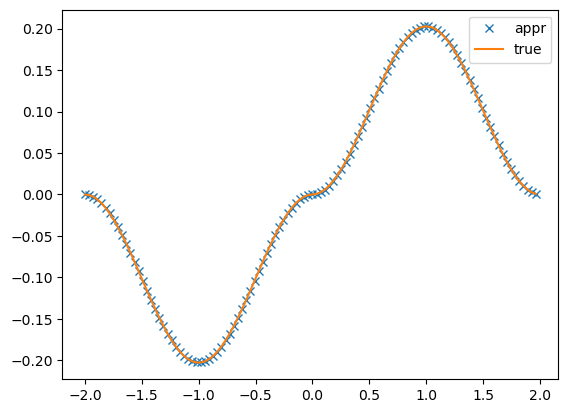

In [14]:
plt.plot(XX,ww2,'x',label='appr')
plt.plot(XX,w2(XX),label='true')
plt.legend()
plt.show()


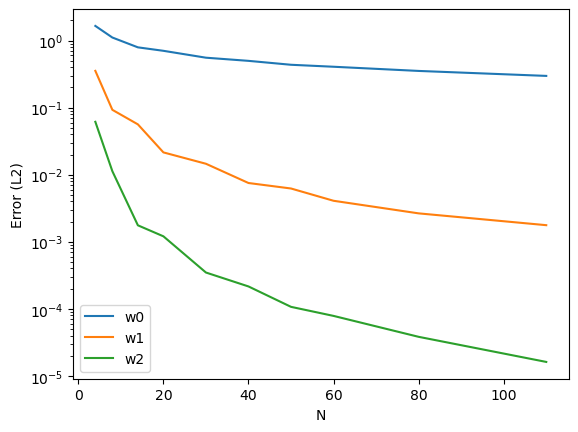

In [17]:
for i in range(3):
    plt.semilogy(Ns,errors[i],label=f'w{i}')

plt.xlabel("N")
plt.ylabel("Error (L2)")
plt.legend()
plt.show()

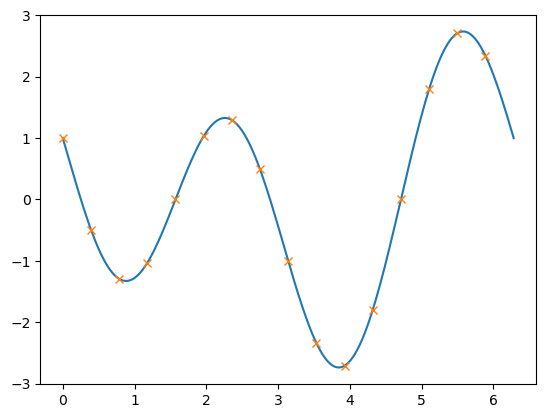

In [8]:
def vfun(x):
    return np.exp(np.sin(np.pi*x))
vfun = np.vectorize(vfun)

def dv(x):
    return np.pi*np.cos(np.pi*x)*vfun(x)
dv = np.vectorize(dv)

def testfun(x):
    return np.sin(x)+np.cos(2*x)
testfun = np.vectorize(testfun)

def dtfun(x):
    return np.cos(x)-2*np.sin(2*x)
dtfun = np.vectorize(dtfun)

def fft_derivative(N, fun, L = 2*np.pi):
    
    h = L/N
    X = np.arange(N)*h
    f = fun(X)

    k = sp.fft.fftfreq(N,1/N) * 1j

    return np.real(sp.fft.ifft( k * sp.fft.fft(f) ))*2*np.pi/L

XX = np.linspace(0,2*np.pi,200)
true_deriv = dtfun(XX)

N = 16
appr_deriv = fft_derivative(N=N,fun=testfun)

plt.plot(XX,true_deriv)
plt.plot(np.arange(N)*2*np.pi/N,appr_deriv,'x')



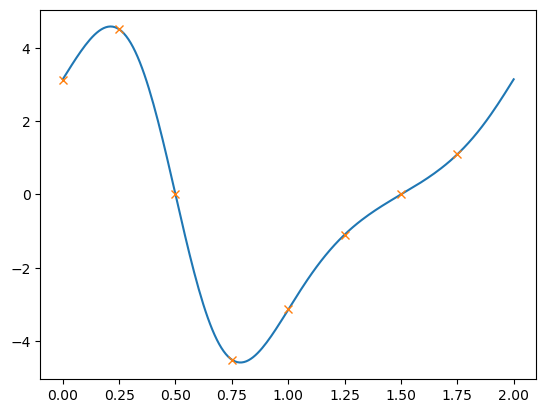

In [9]:
XX = np.linspace(0,2,200)
true_deriv = dv(XX)

N = 8
appr_deriv = fft_derivative(N,vfun,2)

plt.plot(XX,true_deriv)
plt.plot(np.arange(N)*2/N,appr_deriv,'x')